Saving diabetes.csv to diabetes.csv
Contoh data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies         

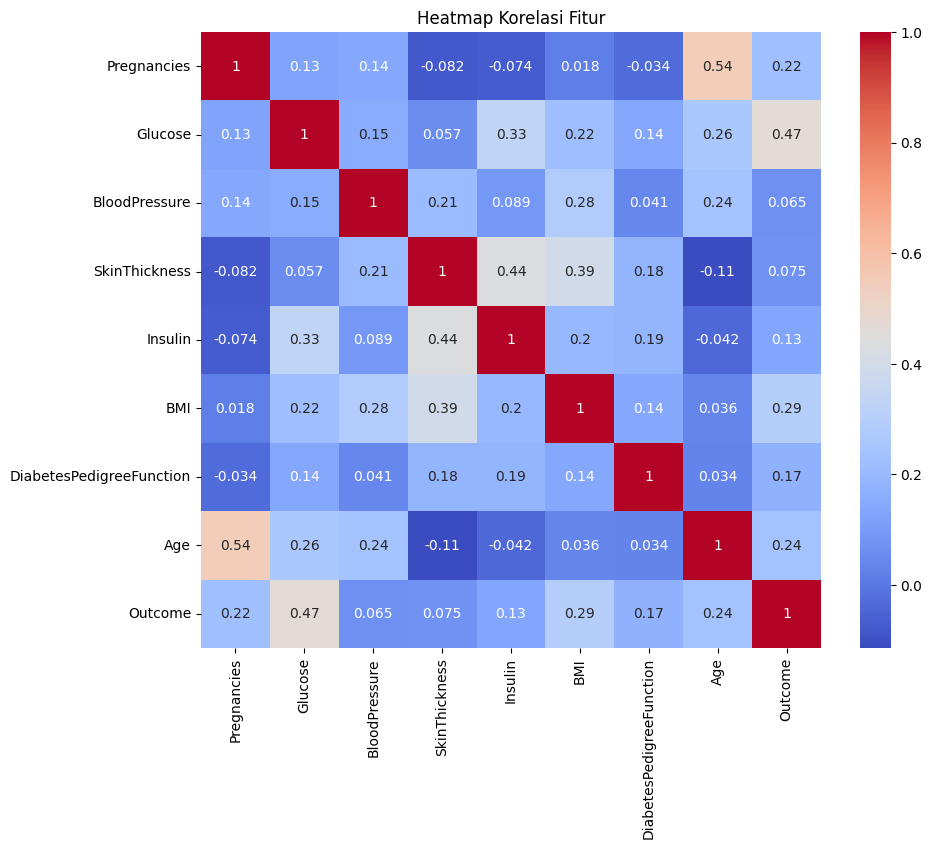

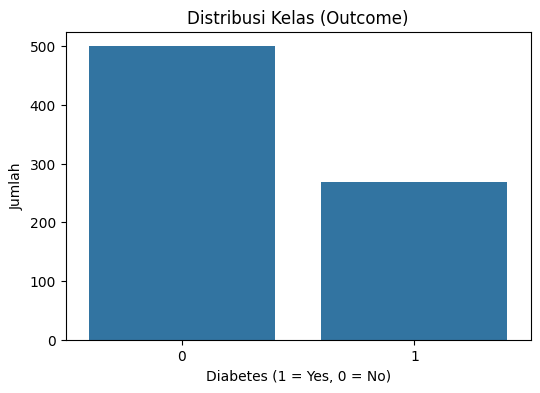


K terbaik adalah 3 dengan akurasi: 0.70


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Upload file CSV jika belum ada
from google.colab import files
uploaded = files.upload()  # Upload 'diabetes.csv'

# 1. Eksplorasi Data
df = pd.read_csv('diabetes.csv')  # Ganti path jika file berada di tempat lain
print("Contoh data:")
print(df.head())

print("\nInfo dataset:")
print(df.info())

print("\nStatistik deskriptif:")
print(df.describe())

# 2. Encoding fitur kategorikal (tidak diperlukan karena semua fitur numerik pada dataset ini)

# 3. Normalisasi fitur numerik
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Bangun model KNN dan uji beberapa nilai K
k_values = [3, 5, 7]
for k in k_values:
    print(f"\nEvaluasi untuk K={k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(classification_report(y_test, y_pred))

# 6. Visualisasi: Korelasi fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

# 7. Visualisasi distribusi outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Kelas (Outcome)")
plt.xlabel("Diabetes (1 = Yes, 0 = No)")
plt.ylabel("Jumlah")
plt.show()

# 8. Kesimpulan (buat manual atau tampilkan nilai akurasi tertinggi)
# Misalnya cari K dengan akurasi terbaik:
best_k = 0
best_score = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nK terbaik adalah {best_k} dengan akurasi: {best_score:.2f}")


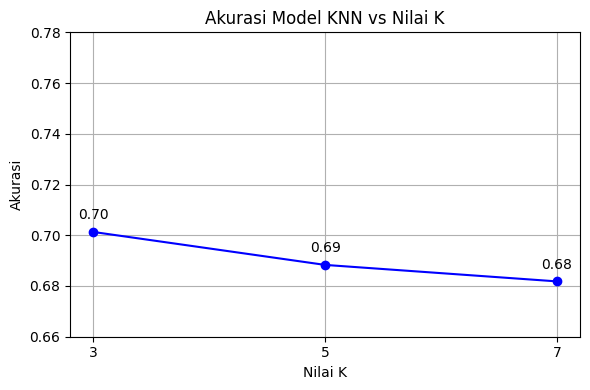

In [3]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Daftar nilai K
k_values = [3, 5, 7]

# Buat list untuk menyimpan akurasi tiap K
akurasi_list = []

# Hitung dan simpan akurasi untuk tiap K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    akurasi_list.append(score)

# Visualisasi akurasi terhadap nilai K
plt.figure(figsize=(6, 4))
plt.plot(k_values, akurasi_list, marker='o', color='blue', linestyle='-')
plt.title('Akurasi Model KNN vs Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.ylim(0.66, 0.78)
plt.xticks(k_values)  # Tampilkan hanya 3, 5, 7 sebagai xticks
plt.grid(True)

# Tambahkan label akurasi di atas titik
for k, score in zip(k_values, akurasi_list):
    plt.text(k, score + 0.005, f"{score:.2f}", ha='center')

plt.tight_layout()
plt.show()
